#### Name: 

# PHYS 230 Lab Assignment 5

### Wednesday, February 4, 2026: Chapter 3.3-3.4
- Density plots
- 2D graphics

#### Start by importing any packages you need below (feel free to update as you go):

In [1]:
import math as m
import numpy as np
import matplotlib.pyplot as plt
import qdraw as qd

## Catch the errors! (15 pts - 5 pts each)

For each of the following cells, find the error (or errors), and correct it (or them) by:<br> 
    a. add a new markdown cell that describes what was wrong with the code,<br>
    b. creating a new code cell with the corrected code (where possible)<br>
<br>
**Make sure to write in complete sentences; corrected code with a poorly written explanation will not receive better than 4 of 5 points on a given question.** I am not looking for a lengthy explanation; but one that is sufficiently detailed to explain the errors. 

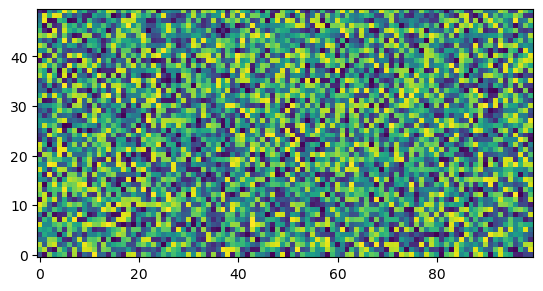

In [5]:
#1 - create a 50 x 100 array of random numbers between 0 and 1 and make a density plot with the origin at the lower left corner
my_array = np.random.rand(50,100)
plt.imshow(my_array, origin='lower')

Firstly, 'my array' needs to be 'my_array' (and change the 'myarray' to 'my_array' in the ply.imshow function). Secondly, 'lower' needs to be have quotes.

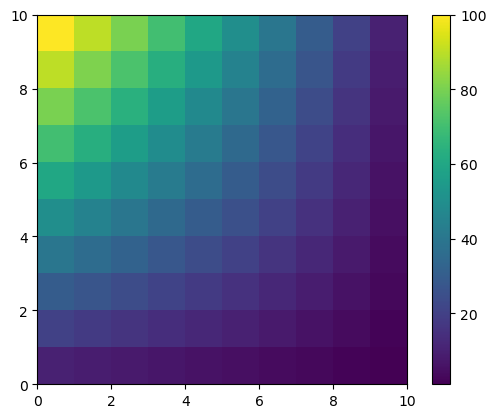

In [53]:
#2 - create a 2D array out of x and y and plot a density plot out of it 
x = np.linspace(1,10,10) # last number here changes x resolution
x_size = np.size(x) # last number here changes y resolution
y = np.linspace(10,1,10)
y_size = np.size(y)
height = np.zeros(x_size*y_size,float)
height = np.reshape(height,(x_size,y_size))
for i in range(0,x_size):
    for j in range(0,y_size):
        height[i,j]=x[i]*y[j]
plt.imshow(height, origin='lower', aspect=y_size/x_size, extent=[0,10,0,10])
plt.colorbar()

The student needs to define height not how they have defined it, as it is an array so 'height=x*y' is insufficient. I have also added a resolution assumption that they were attempting to do a 10x10, but it is now easy to change - while keeping a square output. 

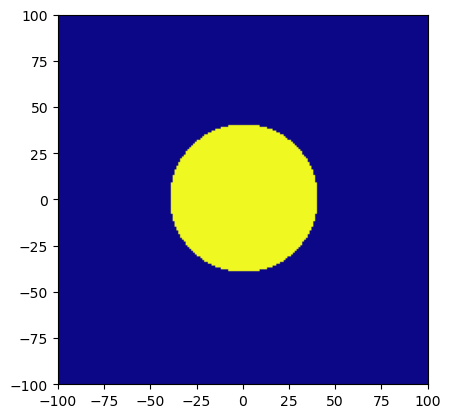

In [118]:
#3 - make a 2D graphic of a circle centered on a,b = 0,0
#qd.circle(pos=(0,0), size=1)
Scale = 200
Radius = 2
Circle_Array = np.zeros((Scale,Scale))


for i in range(Scale):
    for j in range(Scale):
        if np.sqrt((Scale//2-i)**2 + (Scale//2-j)**2)<Scale*Radius//10:
            Circle_Array[i,j]=1
        else:
            Circle_Array[i,j]=0


plt.imshow(Circle_Array, origin='lower', extent=[-Scale//2,Scale//2,-Scale//2,Scale//2])
plt.plasma()

## Short python snippets (10 pts - 5 pts each)
Below each markdow cell, write a short python snippet to perform the indicated action; you will likely have to use google to find out how to perform some of these actions--this is deliberate on my part. Google and *stack overflow* are your friends.<br>
Add a markdown cell to explain your thinking if this is needed.

1. Create a 2D array of random numbers (of your choice) and plot them as a density plot with the origin in the lower left corner. Change the color scheme to some sort of rainbow. 

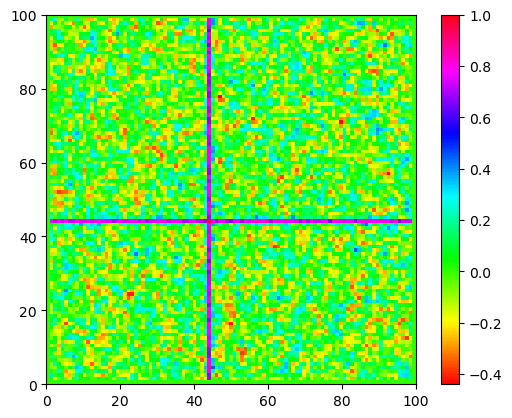

In [77]:
Random_Array = (np.ones((101,101)) - 2*np.random.rand(101,101))/2

Input = int(float(input("Favorite Positive Number Less than 100: "))//1)
Random_Array[Input,:] = 1
Random_Array[:,Input] = 1
Array = np.copy(Random_Array)

def smoother(array):
    Smoothed_array = np.zeros((101,101))
    for i in range(1,100):
        for j in range(1,100): 
            Smoothed_array[i,j] = ((4*array[i,j]+array[i+1,j]+array[i-1,j]+array[i,j+1]+array[i,j-1])/8)
    return Smoothed_array
Array = smoother(Array)
plt.imshow(Array, origin='lower',extent=[0,100,0,100])
plt.colorbar()
plt.hsv()

2. In a window with a background color of your choice (not white), create a rectangle at the center with 2 circles in different locations around the window. Make the circles your favorite colors (of those available). 

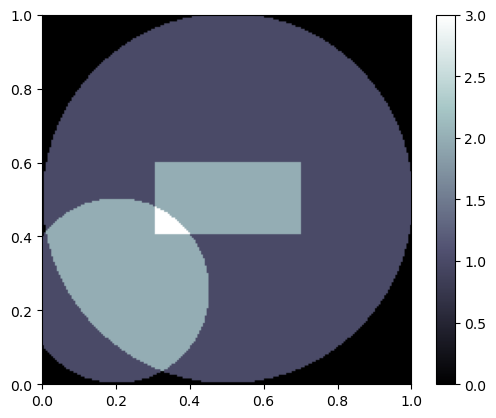

In [163]:
Scale = 200
Radius = 2


def Circlification(scale, radius, x,y):
    array_int = np.zeros((scale,scale))
    for i in range(scale):
        for j in range(scale):
            if np.sqrt((x*scale-i)**2 + (y*scale-j)**2)<scale*radius:
                array_int[i,j]=1
            else:
                array_int[i,j]=0
    return array_int

def rectangle(scale, length,height, x,y):
    
    array_int = np.zeros((scale,scale))
    
    for i in range(scale):
        
        for j in range(scale):
            
            if np.absolute(x*scale-i)<length*scale and np.absolute(y*scale-j)<height*scale:
                
                array_int[i,j]=1
            else:
                array_int[i,j]=0
    return array_int

Rectangle_Array = rectangle(200,0.1,0.2,.5,.5)
Circle_Array = Circlification(200, 1/4, 1/4,1/5) + Circlification(200, 1/2, 1/2,1/2)

Total = Rectangle_Array + Circle_Array
plt.imshow(Total, origin='lower', extent=[0,1,0,1])
plt.colorbar()
plt.bone()


### Write a script 1 
#### Making a density plot of a function

Write a code to do the following: 
- Create a 2D array that shows how the values change linearly from the center outwards based on the equation: 
$$ B = 7.5r - 2.8 $$
    - the overall grid should be 200 x 200 units 
    - you should use a 1000x1000 array
- Plot the array as a density plot, change the color scale to one of your choice, and include a color bar

When your program is complete, add a markdown cell below it to explain your process and program. 

-2.8


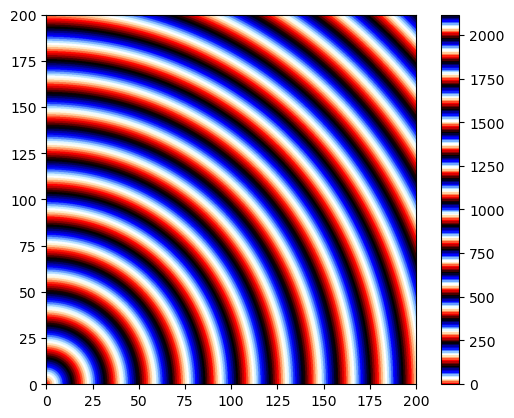

In [87]:
Point_Count = 1000
Spacing = 5
Grid_Size = Point_Count/Spacing
Distance_Array = np.zeros((Point_Count, Point_Count))
for i in range(Point_Count):
    for j in range(Point_Count):
        Distance_Array[i,j] = np.sqrt((i/Spacing)**2+(j/Spacing)**2)
B_Array = 7.5*Distance_Array - 2.8
print(B_Array[0,0])
plt.imshow(B_Array, origin = 'lower', extent=[0,Grid_Size,0,Grid_Size])
plt.flag()
plt.colorbar()

### Write a script 2
#### Making 2D objects - making a slice of pizza

Write a code to do the following: 
- Create a window that is 4 x 4
- Make a slice of pepperoni using the following objects:
    - A polygon (triangle) for the slice
    - A rectangle for the crust
    - Circles for the slices of pepperoni
- Make the background white and remember the cheese is yellow!

When your program is complete, add a markdown cell below it to explain your process and program. 